In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv


# Load dataset
# Assuming the dataset is a CSV file, if not you can replace this with the appropriate file reading method

In [2]:
data = pd.read_csv('/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv')

# Display first few rows

In [3]:
print("Initial Data Preview:")
print(data.head())

Initial Data Preview:
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quali

# Check for missing values

In [4]:
print("\nMissing Values Summary:")
print(data.isnull().sum())


Missing Values Summary:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


# Check for duplicates and remove them

In [5]:
data = data.drop_duplicates()
print(f"\nData Shape after removing duplicates: {data.shape}")


Data Shape after removing duplicates: (6607, 20)


In [6]:
# Data type check
print("\nData Types Summary:")
print(data.dtypes)


Data Types Summary:
Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object


In [7]:
# Print all column names to check if 'High_Score' exists
print("Current DataFrame Columns:")
print(data.columns.tolist())

# If 'High_Score' exists, check its unique values and map
if 'High_Score' in data.columns:
    print("Unique values in 'High_Score':", data['High_Score'].unique())

    # Map 'Yes' and 'No' to 1 and 0 respectively
    data['High_Score'] = data['High_Score'].map({'Yes': 1, 'No': 0})

    # Verify the conversion
    print("\nData Types After Mapping 'High_Score':")
    print(data.dtypes)
else:
    print("'High_Score' column does not exist in the DataFrame.")


Current DataFrame Columns:
['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender', 'Exam_Score']
'High_Score' column does not exist in the DataFrame.


# Create a new feature based on Exam_Score

In [8]:
data['High_Score'] = np.where(data['Exam_Score'] > 70, 'Yes', 'No')


# Convert object columns to int64 where possible

In [9]:
object_cols = data.select_dtypes(include='object').columns
for col in object_cols:
    try:
        # Attempt to convert to int
        data[col] = pd.to_numeric(data[col], errors='raise')  # Will raise an error for non-convertible values
    except ValueError:
        print(f"Warning: Column '{col}' could not be converted to int. It may contain non-numeric values.")


# Convert categorical variables to appropriate types

In [10]:
categorical_columns = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 
                       'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 
                       'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 
                       'Distance_from_Home', 'Gender']
for col in categorical_columns:
    data[col] = data[col].astype('category')

# Descriptive statistics

In [11]:
print("\nDescriptive Statistics:")
print(data.describe(include='all'))


Descriptive Statistics:
        Hours_Studied   Attendance Parental_Involvement Access_to_Resources  \
count     6607.000000  6607.000000                 6607                6607   
unique            NaN          NaN                    3                   3   
top               NaN          NaN               Medium              Medium   
freq              NaN          NaN                 3362                3319   
mean        19.975329    79.977448                  NaN                 NaN   
std          5.990594    11.547475                  NaN                 NaN   
min          1.000000    60.000000                  NaN                 NaN   
25%         16.000000    70.000000                  NaN                 NaN   
50%         20.000000    80.000000                  NaN                 NaN   
75%         24.000000    90.000000                  NaN                 NaN   
max         44.000000   100.000000                  NaN                 NaN   

       Extracurricular_Act

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of numerical features

<Figure size 1500x1000 with 0 Axes>

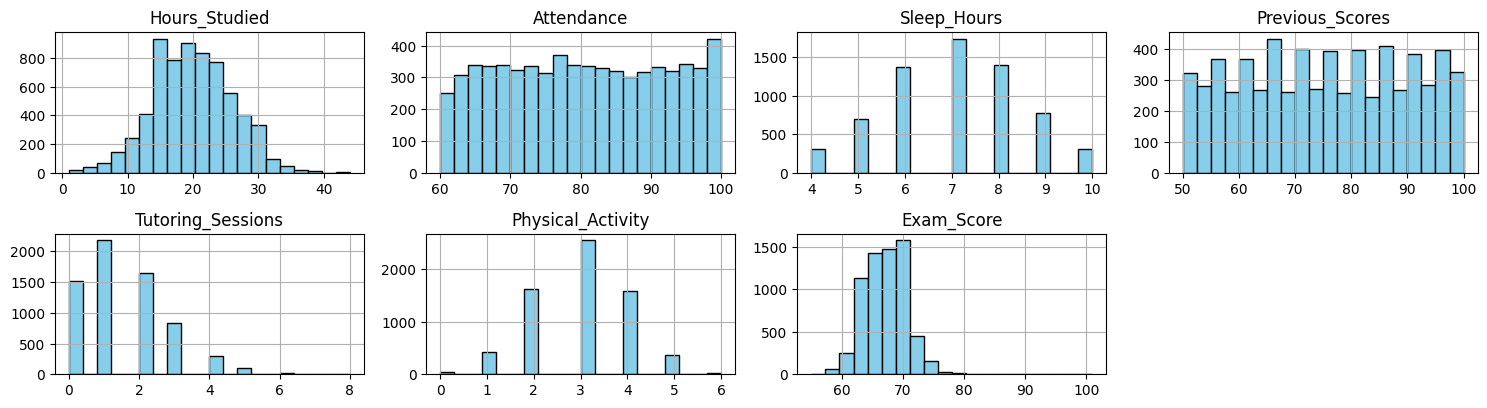

In [13]:
plt.figure(figsize=(15, 10))
data.hist(bins=20, figsize=(15, 10), layout=(5, 4), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

# Exam scores distribution

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


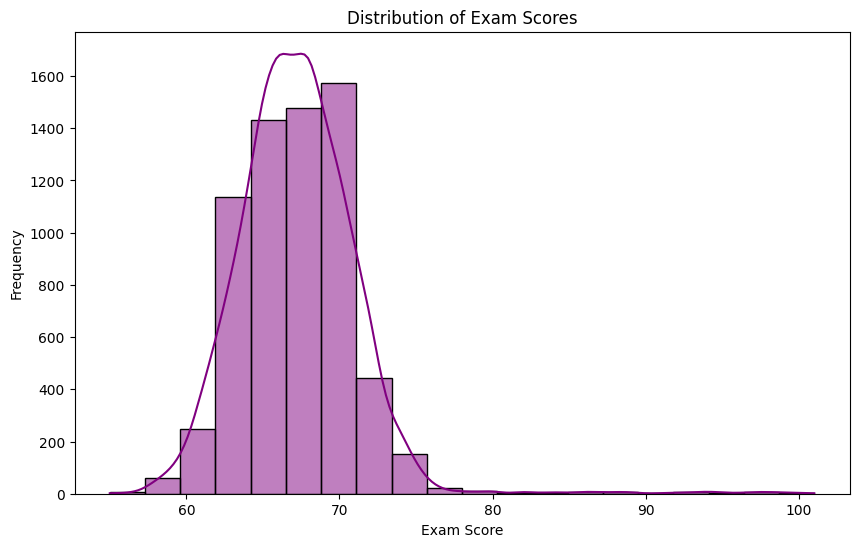

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Exam_Score'], bins=20, kde=True, color='purple')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()


# Boxplot - Exam scores based on various categorical features

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_

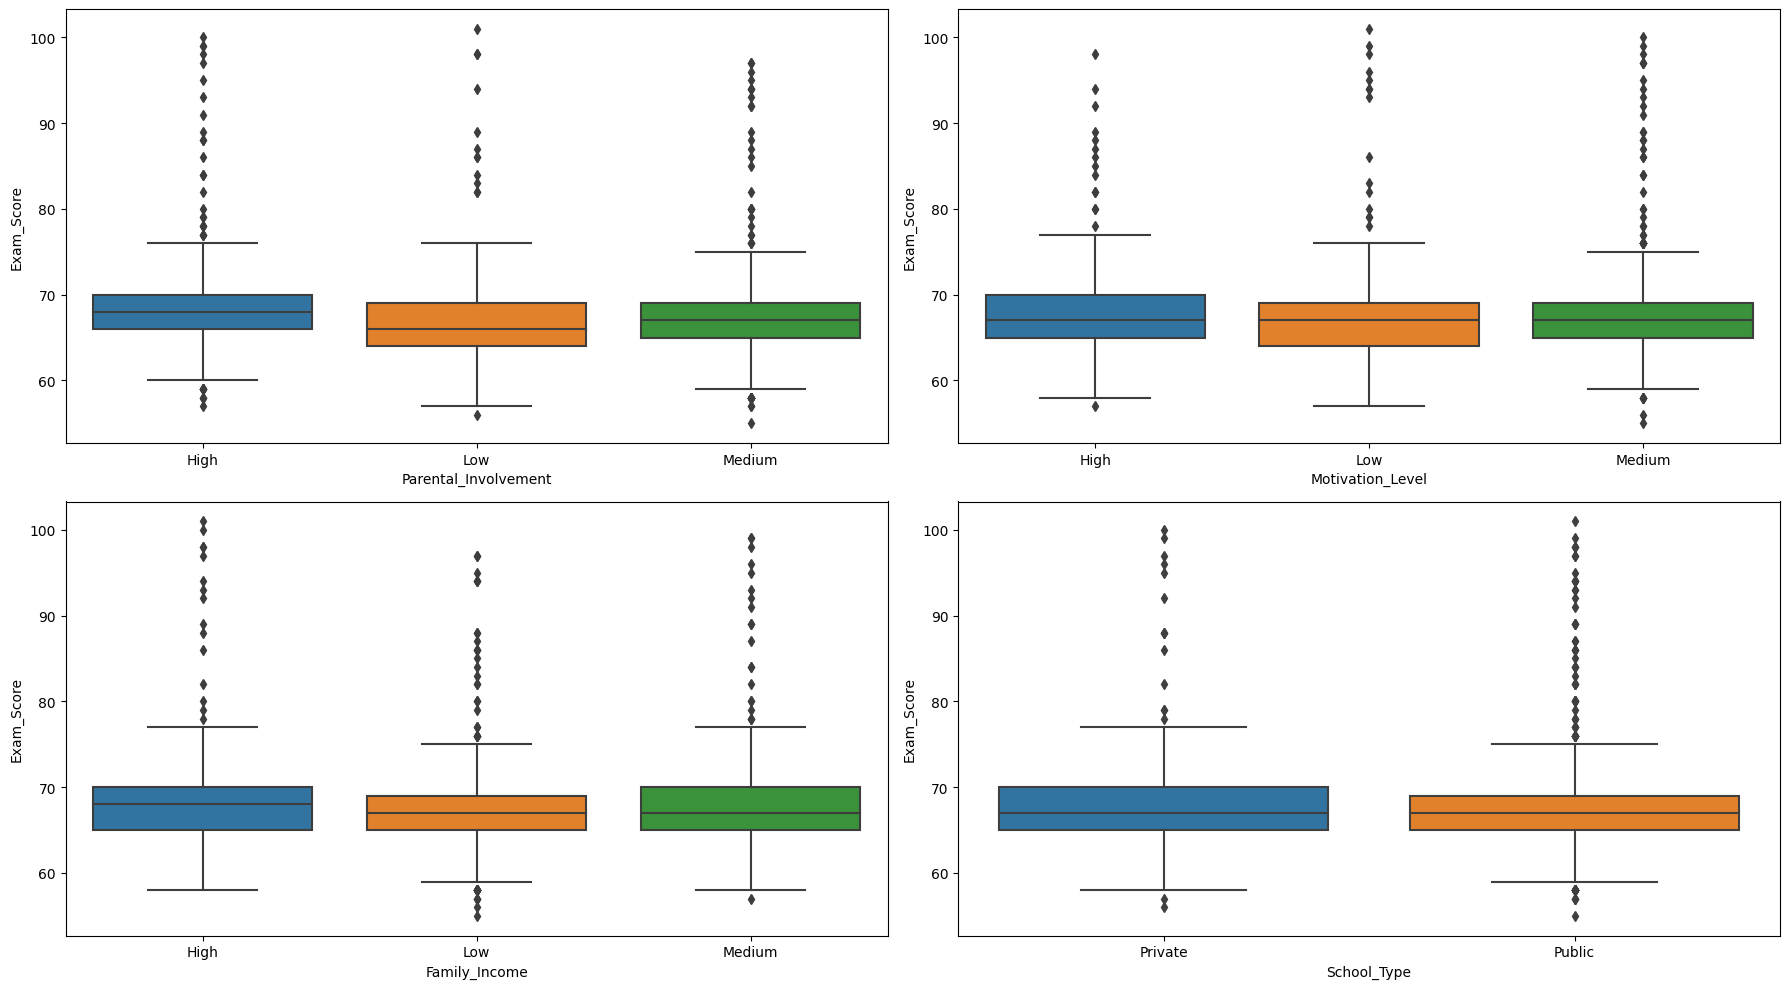

In [15]:
plt.figure(figsize=(18, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x='Parental_Involvement', y='Exam_Score', data=data)
plt.subplot(2, 2, 2)
sns.boxplot(x='Motivation_Level', y='Exam_Score', data=data)
plt.subplot(2, 2, 3)
sns.boxplot(x='Family_Income', y='Exam_Score', data=data)
plt.subplot(2, 2, 4)
sns.boxplot(x='School_Type', y='Exam_Score', data=data)
plt.tight_layout()
plt.show()

# Count plots of categorical variables

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


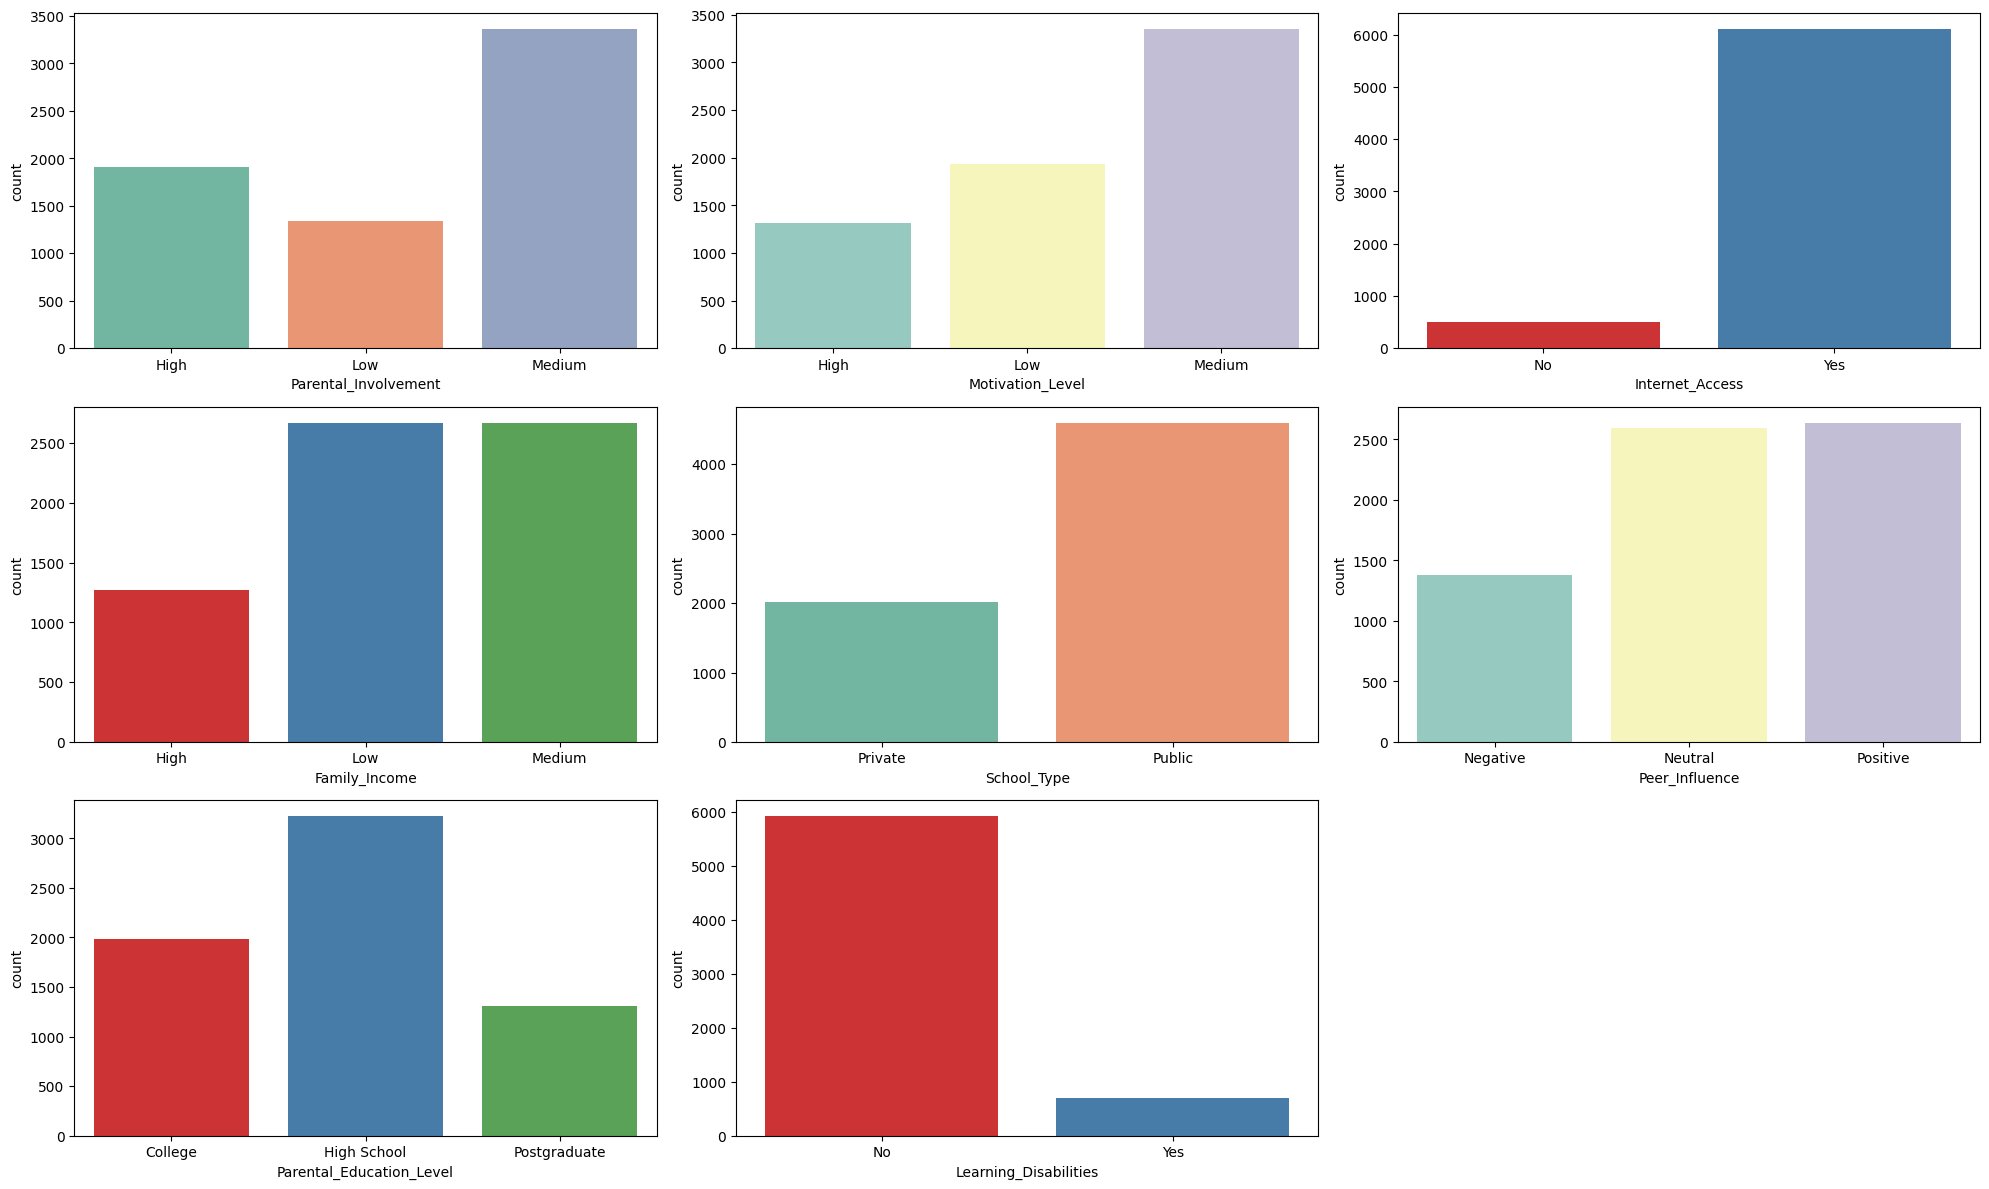

In [16]:
plt.figure(figsize=(20, 12))
plt.subplot(3, 3, 1)
sns.countplot(x='Parental_Involvement', data=data, palette='Set2')
plt.subplot(3, 3, 2)
sns.countplot(x='Motivation_Level', data=data, palette='Set3')
plt.subplot(3, 3, 3)
sns.countplot(x='Internet_Access', data=data, palette='Set1')
plt.subplot(3, 3, 4)
sns.countplot(x='Family_Income', data=data, palette='Set1')
plt.subplot(3, 3, 5)
sns.countplot(x='School_Type', data=data, palette='Set2')
plt.subplot(3, 3, 6)
sns.countplot(x='Peer_Influence', data=data, palette='Set3')
plt.subplot(3, 3, 7)
sns.countplot(x='Parental_Education_Level', data=data, palette='Set1')
plt.subplot(3, 3, 8)
sns.countplot(x='Learning_Disabilities', data=data, palette='Set1')
plt.tight_layout()
plt.show()

Further Analysis 

# Count plots of categorical variables

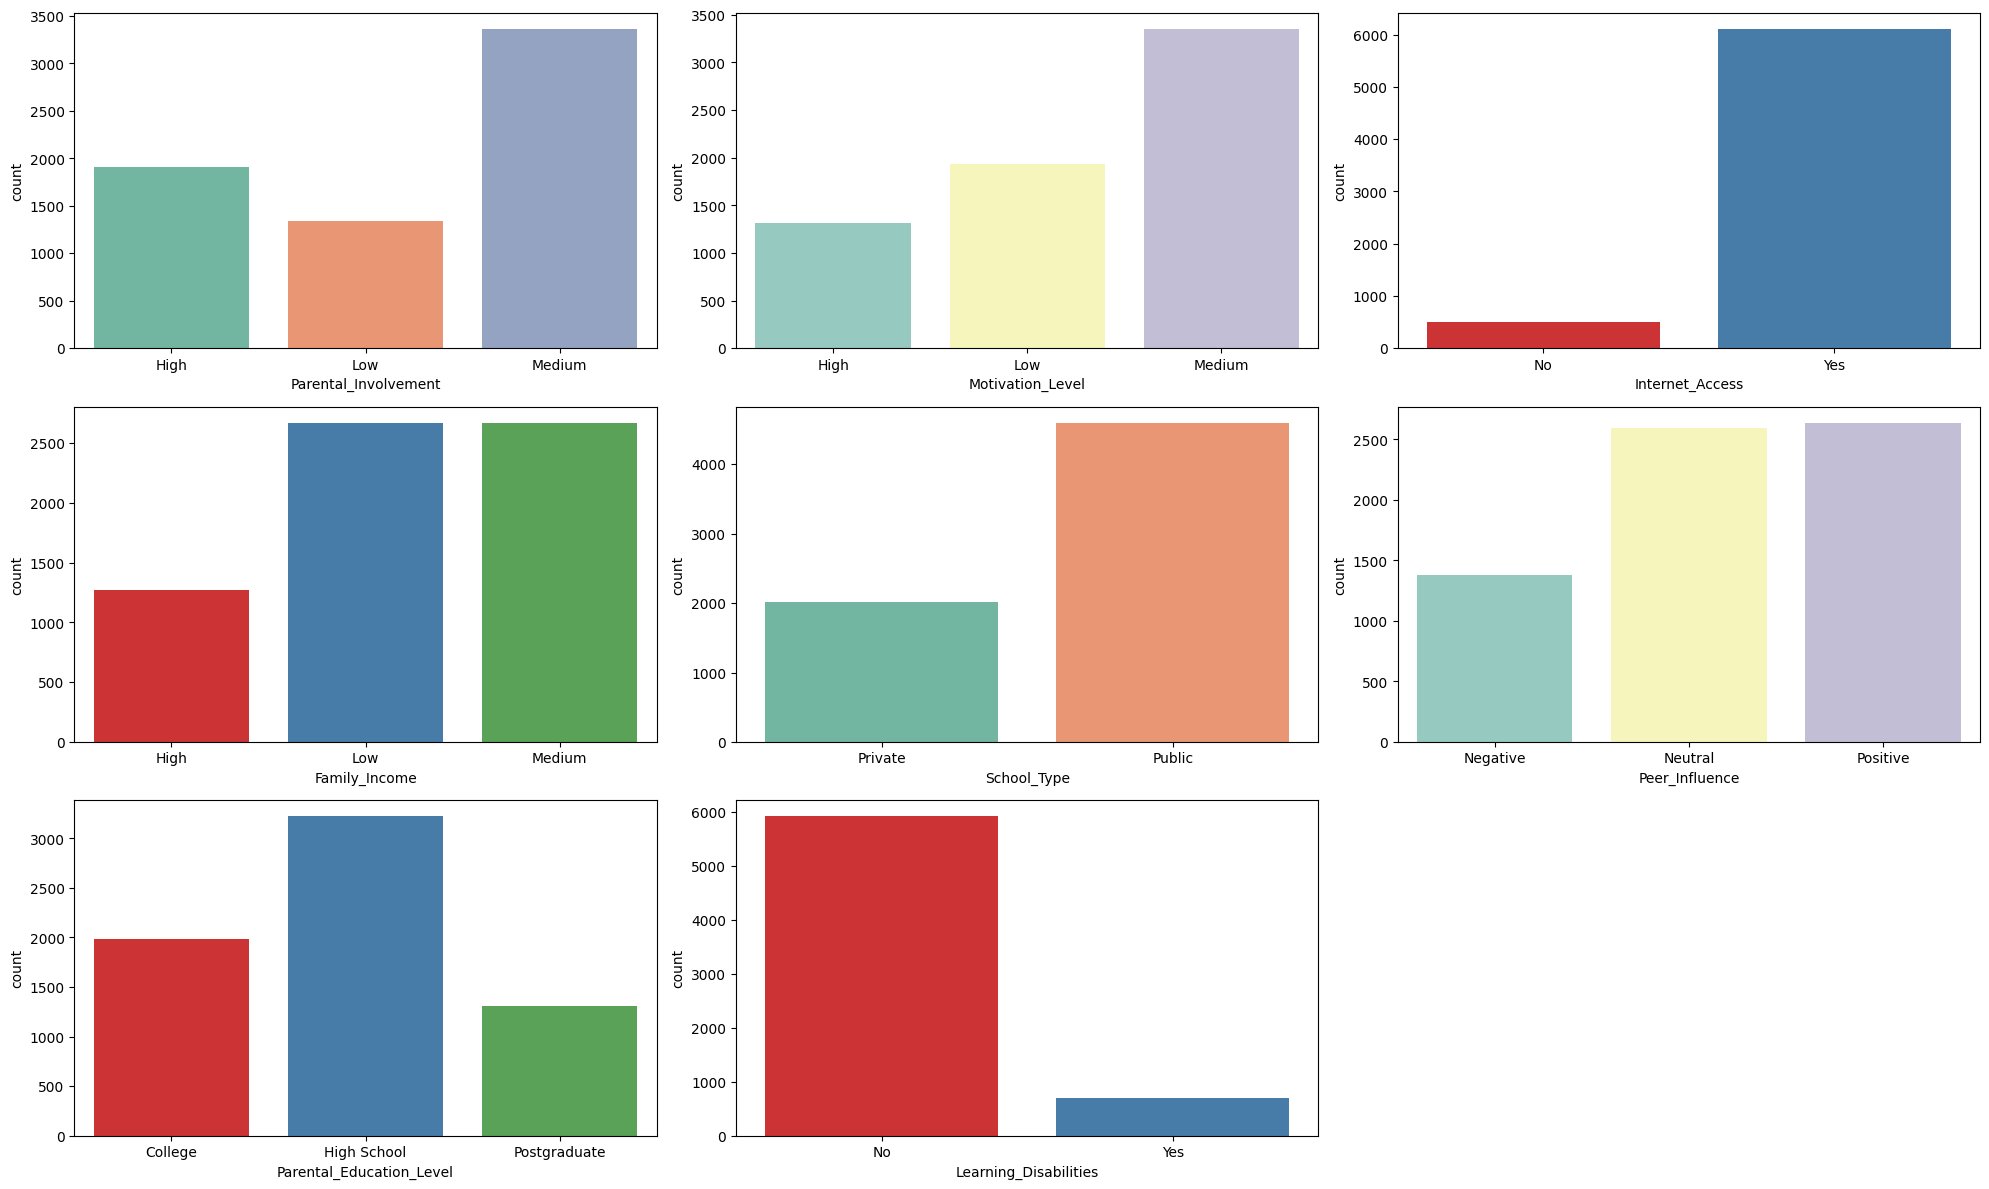

In [17]:
plt.figure(figsize=(20, 12))
plt.subplot(3, 3, 1)
sns.countplot(x='Parental_Involvement', data=data, palette='Set2')
plt.subplot(3, 3, 2)
sns.countplot(x='Motivation_Level', data=data, palette='Set3')
plt.subplot(3, 3, 3)
sns.countplot(x='Internet_Access', data=data, palette='Set1')
plt.subplot(3, 3, 4)
sns.countplot(x='Family_Income', data=data, palette='Set1')
plt.subplot(3, 3, 5)
sns.countplot(x='School_Type', data=data, palette='Set2')
plt.subplot(3, 3, 6)
sns.countplot(x='Peer_Influence', data=data, palette='Set3')
plt.subplot(3, 3, 7)
sns.countplot(x='Parental_Education_Level', data=data, palette='Set1')
plt.subplot(3, 3, 8)
sns.countplot(x='Learning_Disabilities', data=data, palette='Set1')
plt.tight_layout()
plt.show()

# Pairplot to observe relationships between numerical variables and Exam Scores

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

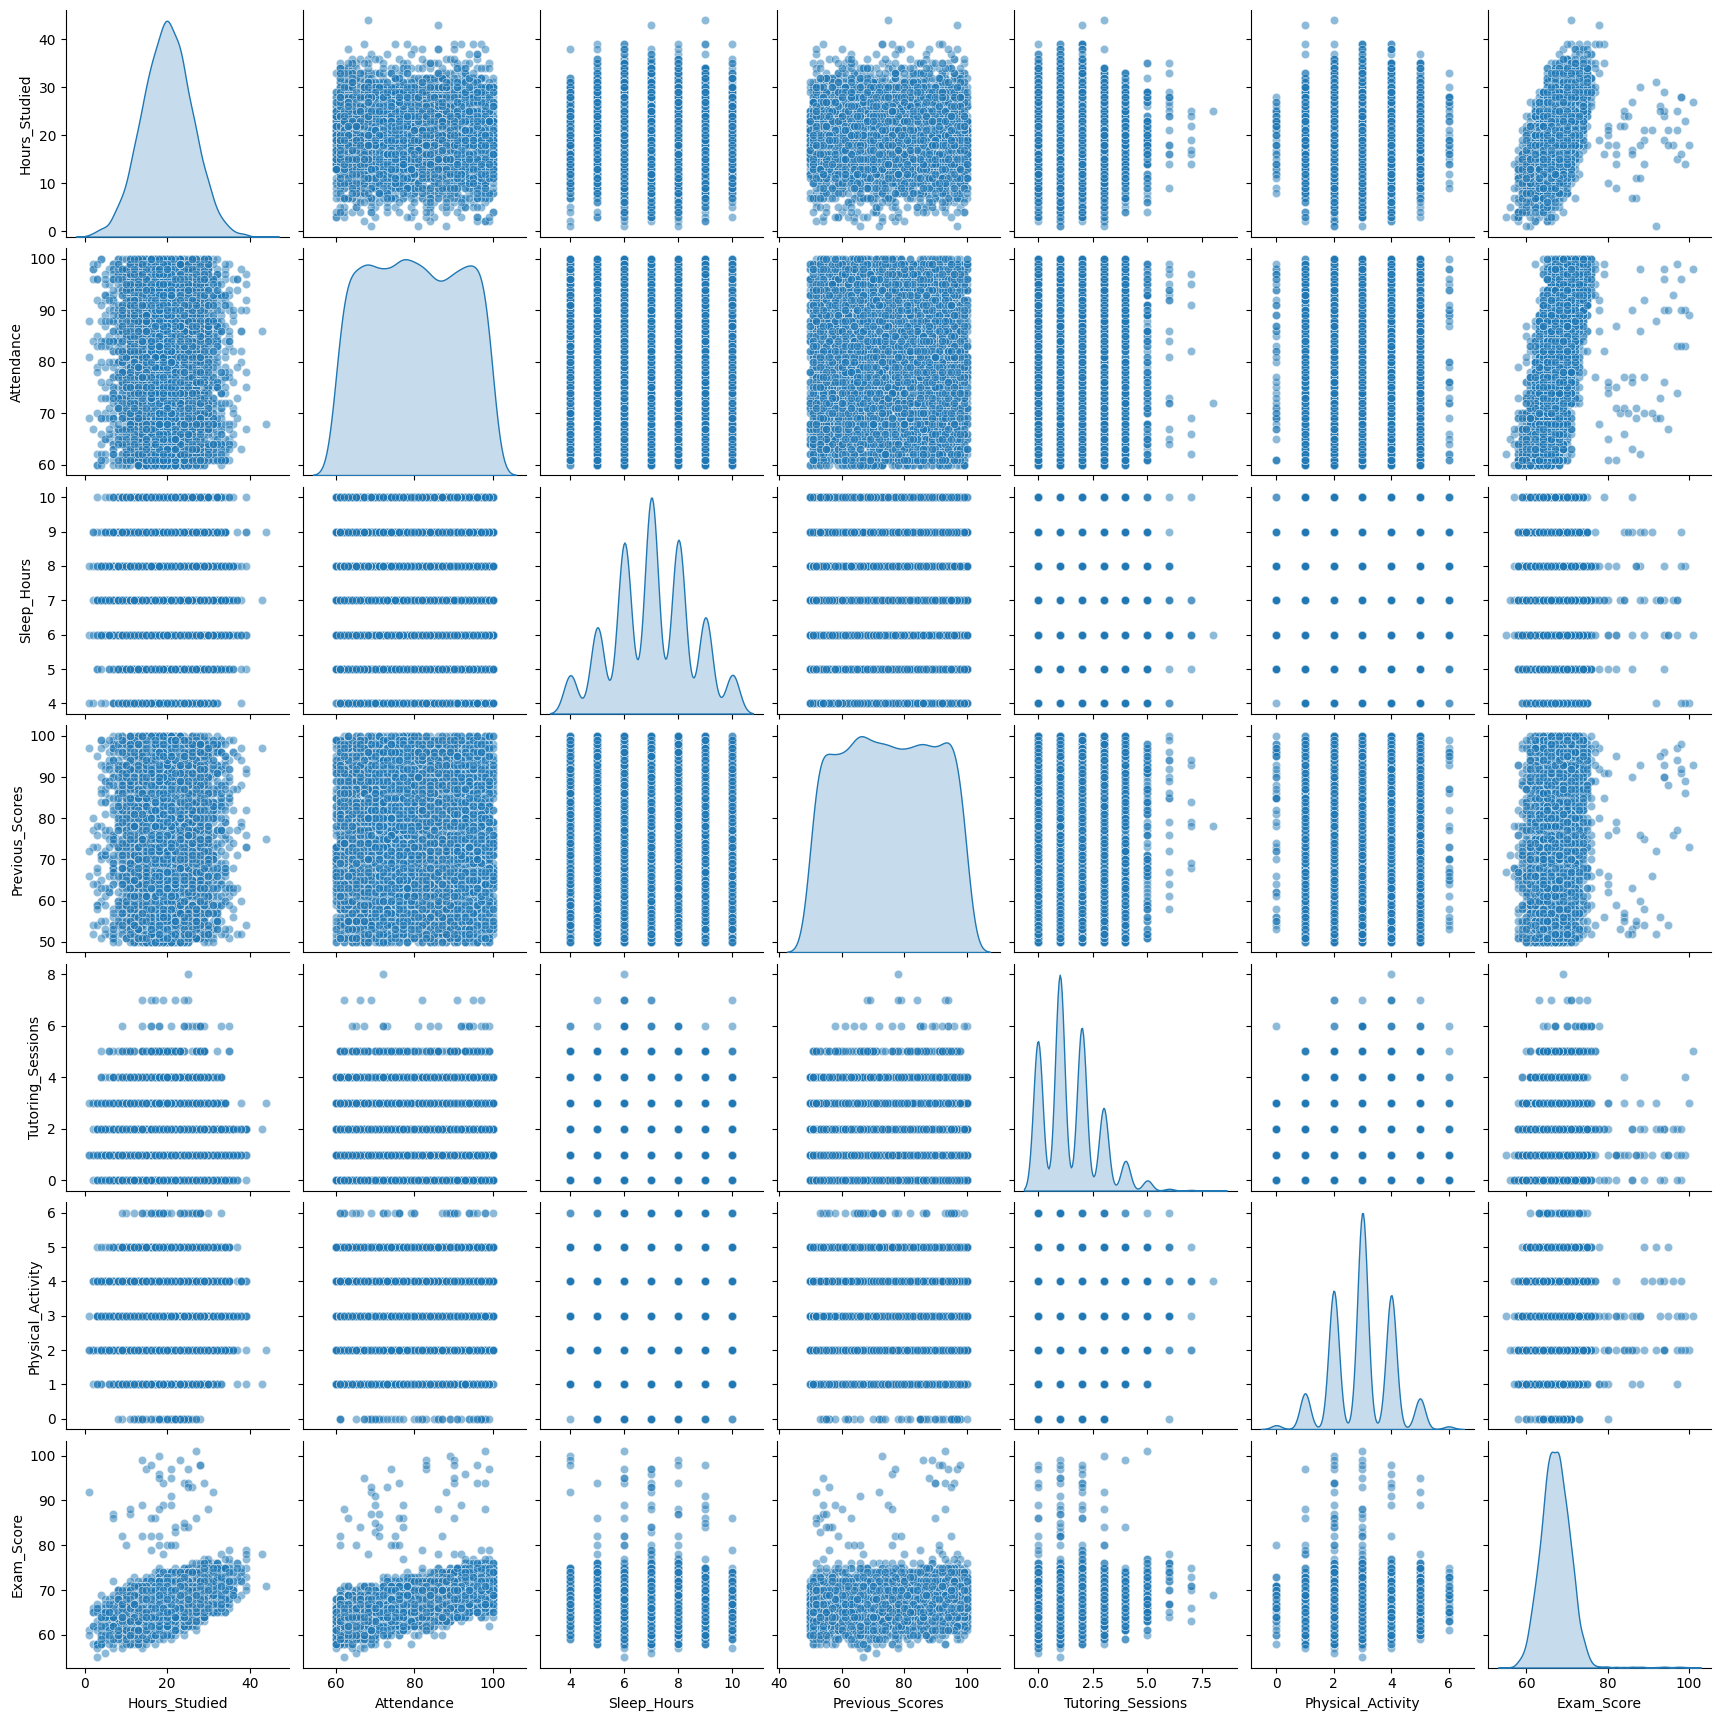

In [18]:
sns.pairplot(data, diag_kind='kde', plot_kws={'alpha':0.5})
plt.show()

# Impact of Study Hours on Exam Score

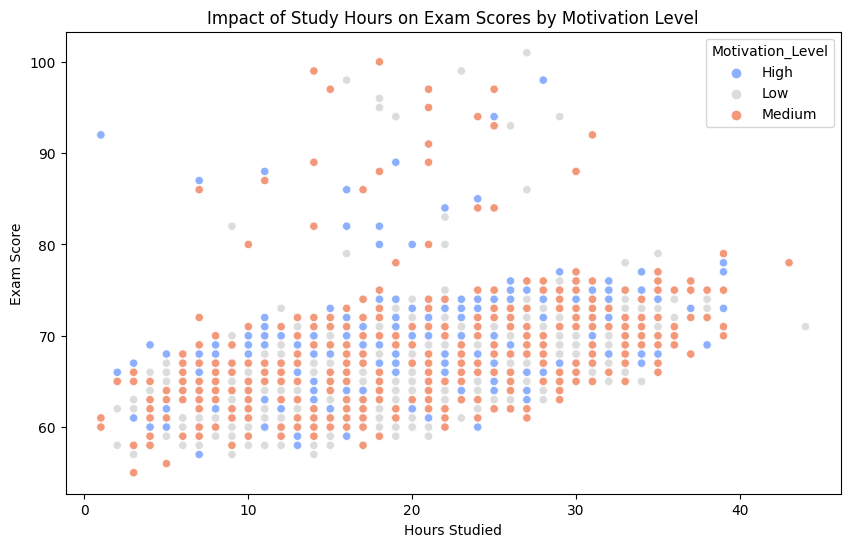

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=data, hue='Motivation_Level', palette='coolwarm')
plt.title('Impact of Study Hours on Exam Scores by Motivation Level')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()

# Distribution of exam scores by different factors (using boxplot)

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


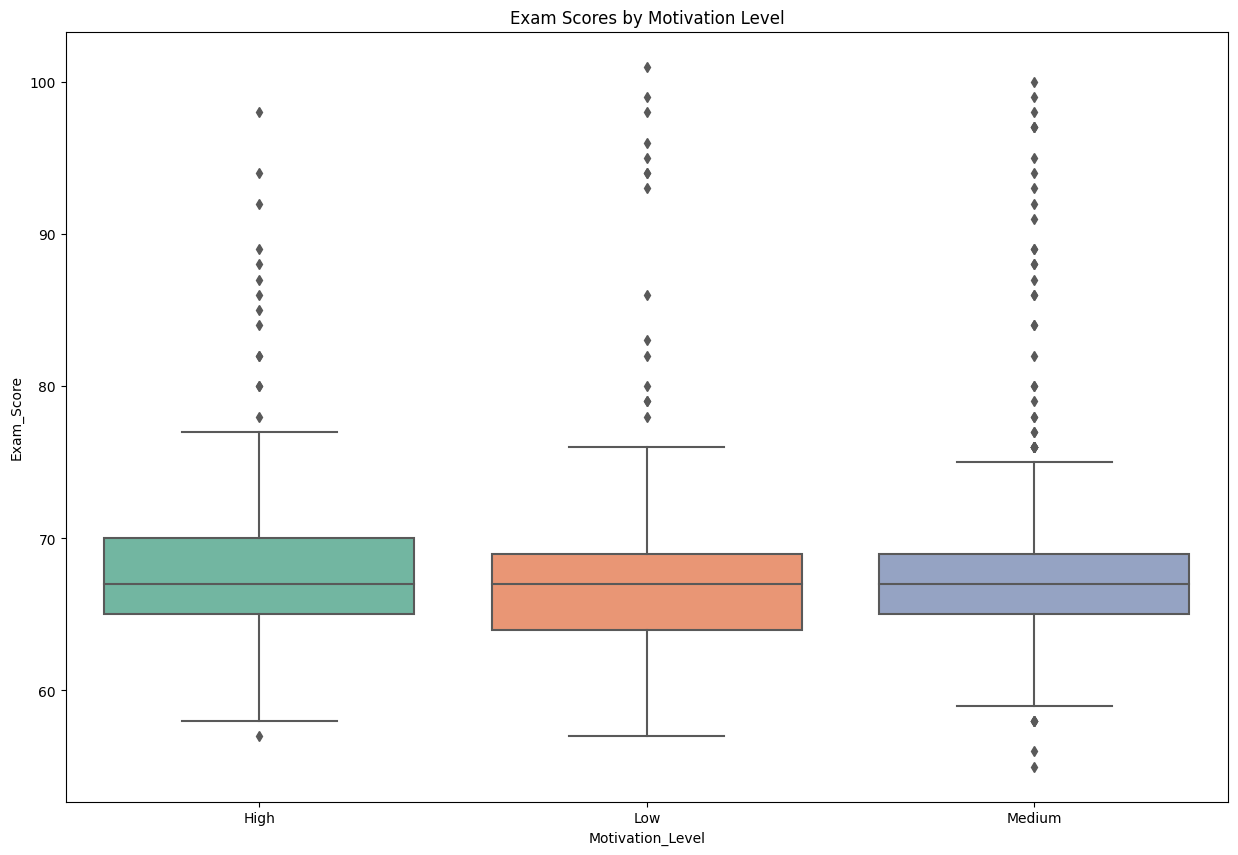

In [20]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Motivation_Level', y='Exam_Score', data=data, palette='Set2')
plt.title('Exam Scores by Motivation Level')
plt.show()

# Multivariate Analysis using Pairplot

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Figure size 1500x1000 with 0 Axes>

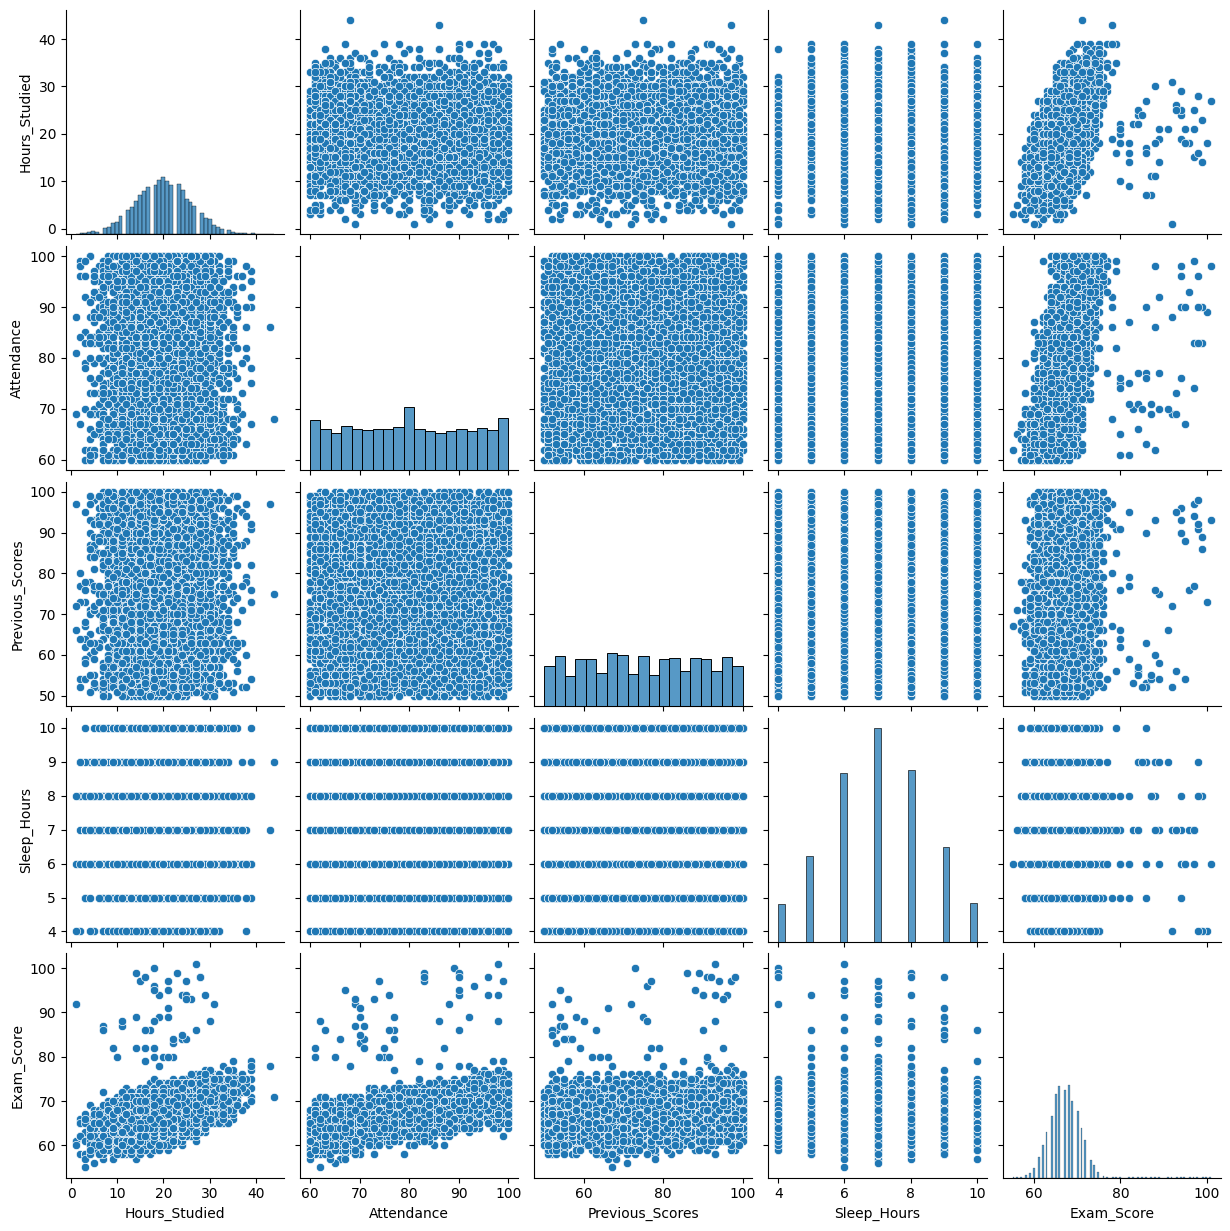

In [21]:
plt.figure(figsize=(15, 10))
sns.pairplot(data[['Hours_Studied', 'Attendance', 'Previous_Scores', 'Sleep_Hours', 'Exam_Score']])
plt.show()

#  Impact of Sleep Hours on Exam Score

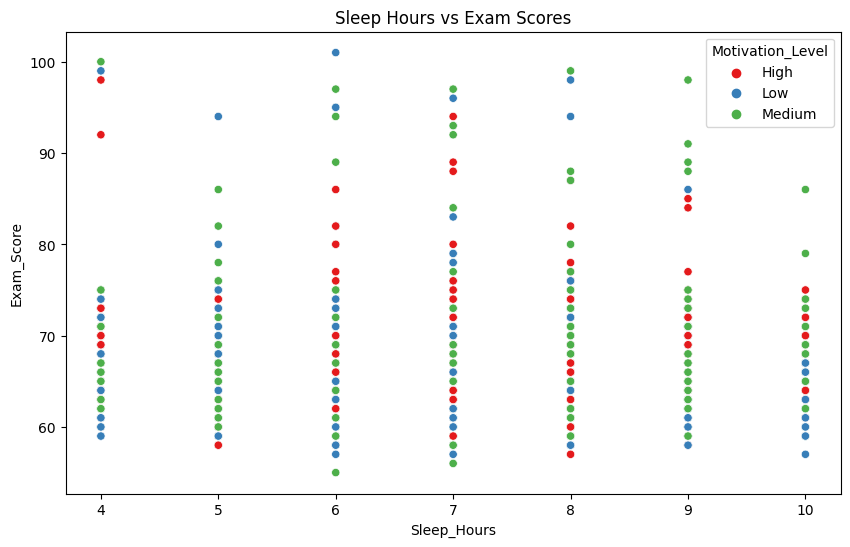

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sleep_Hours', y='Exam_Score', data=data, hue='Motivation_Level', palette='Set1')
plt.title('Sleep Hours vs Exam Scores')
plt.show()

# Cross-tabulation for categorical data

In [23]:
ct_table = pd.crosstab(data['School_Type'], data['Parental_Involvement'])
print("\nCross-tabulation between School_Type and Parental_Involvement:")
print(ct_table)


Cross-tabulation between School_Type and Parental_Involvement:
Parental_Involvement  High  Low  Medium
School_Type                            
Private                589  380    1040
Public                1319  957    2322


# --- Feature Engineering ---

# Create a new feature based on Exam_Score

In [24]:
data['High_Score'] = np.where(data['Exam_Score'] > 70, 'Yes', 'No')

# Visualize the distribution of the new feature

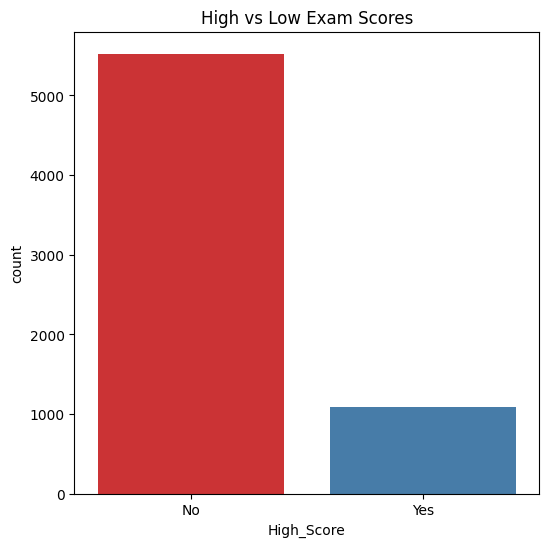

In [25]:
plt.figure(figsize=(6, 6))
sns.countplot(x='High_Score', data=data, palette='Set1')
plt.title('High vs Low Exam Scores')
plt.show()

# --- Conclusions and Insights ---
# This will depend on the visualizations and analysis results, such as which features are most correlated 
# with exam scores, or how certain factors like parental involvement, motivation, and study hours impact 
# academic performance.
